# TimeSynth

#### Get latest version

In [1]:
%%capture
!pip uninstall timesynth --yes
!pip install git+https://github.com/TimeSynth/TimeSynth.git

#### Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [23]:
import timesynth as ts
import numpy as np

#### Harmonic Signals

In [3]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)

In [4]:
# Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(frequency=0.25)

In [5]:
# Initializing Gaussian noise
white_noise = ts.noise.GaussianNoise(std=0.3)

In [6]:
# Initializing TimeSeries class with the signal and noise objects
timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)

In [7]:
# Sampling using the irregular time samples
samples, signals, errors = timeseries.sample(irregular_time_samples)

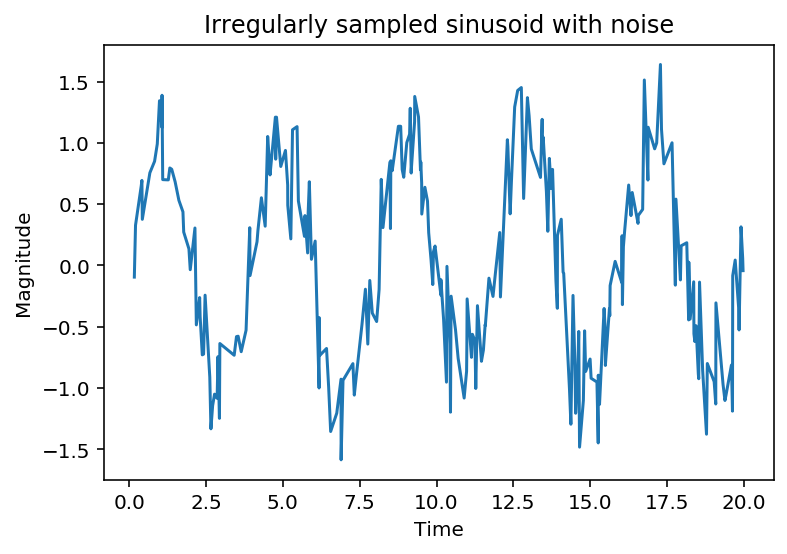

In [9]:
# Plotting the series
plt.plot(irregular_time_samples, samples)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with noise');

#### Harmonic Signals with Red noise

In [9]:
# Initializing Gaussian noise
red_noise = ts.noise.RedNoise(std=0.5, tau=0.8)

In [10]:
# Initializing TimeSeries class with the signal and noise objects
timeseries_corr = ts.TimeSeries(sinusoid, noise_generator=red_noise)

In [11]:
# Sampling using the irregular time samples
samples_corr, signals_corr, errors_corr = timeseries_corr.sample(irregular_time_samples)

In [12]:
# Plotting the series
plt.plot(irregular_time_samples, samples_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with red noise')

Text(0.5,1,'Irregularly sampled sinusoid with red noise')

In [13]:
plt.plot(irregular_time_samples, errors_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Red noise');

#### PseudoPeriodic Signals

In [14]:
# Initializing TimeSampler
time_sampler_pp = ts.TimeSampler(stop_time=20)
# Sampling irregular time samples
irregular_time_samples_pp = time_sampler_pp.sample_irregular_time(resolution=0.05, keep_percentage=50)

In [15]:
# Initializing Pseudoperiodic signal
pseudo_periodic = ts.signals.PseudoPeriodic(frequency=2, freqSD=0.01, ampSD=0.5)

In [16]:
# Initializing TimeSeries class with the pseudoperiodic signal
timeseries_pp = ts.TimeSeries(pseudo_periodic)

In [17]:
# Sampling using the irregular time samples
samples_pp, signals_pp, errors_pp = timeseries_pp.sample(irregular_time_samples_pp)

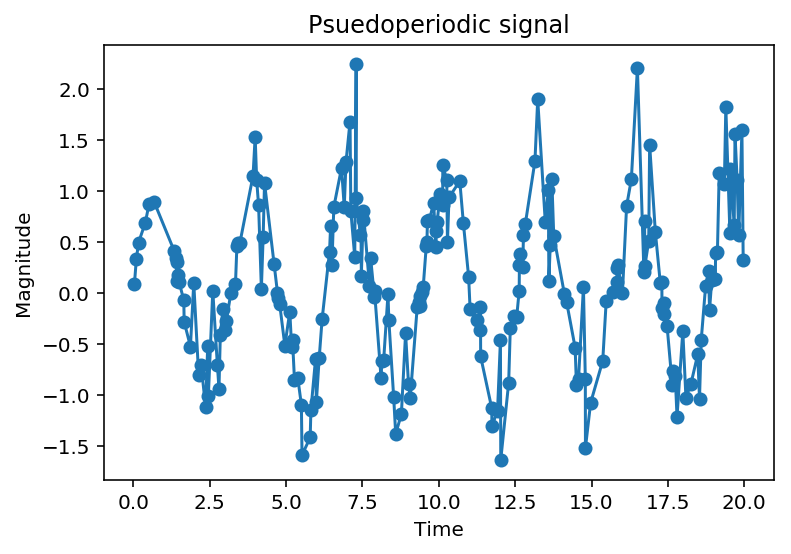

In [18]:
# Plotting the series
plt.plot(irregular_time_samples_pp, samples_pp, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Pseudoperiodic signal');

#### Gaussian Process signals

In [19]:
gp = ts.signals.GaussianProcess(kernel='Matern', nu=3./2)
gp_series = ts.TimeSeries(signal_generator=gp)
samples = gp_series.sample(irregular_time_samples)[0]

In [20]:
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gaussian Process signal with Matern 3/2-kernel');

#### CAR model

In [21]:
car = ts.signals.CAR(ar_param=0.9, sigma=0.01)
car_series = ts.TimeSeries(signal_generator=car)
samples = car_series.sample(irregular_time_samples)

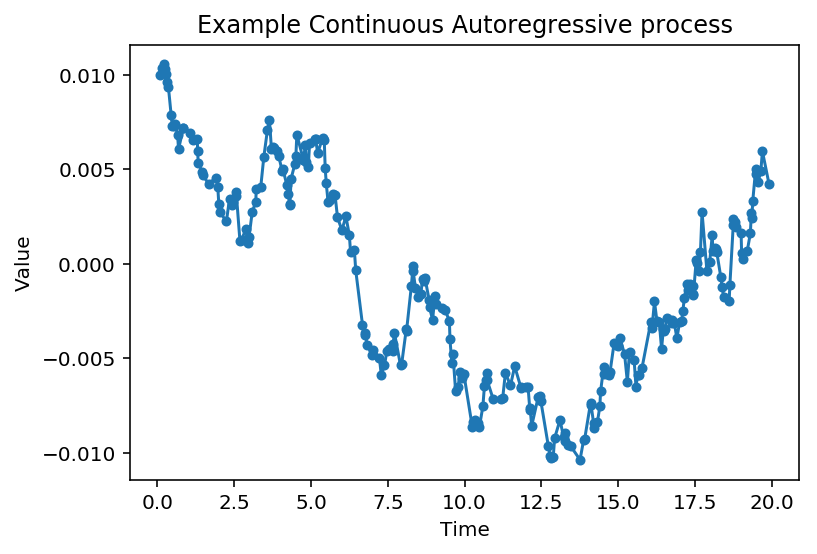

In [22]:
plt.plot(irregular_time_samples, samples[0], marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Example Continuous Autoregressive process');

#### AR model for regularly sampled timestamps

In [23]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)
# Sampling regular time samples
regular_time_samples = time_sampler.sample_regular_time(num_points=500)

In [24]:
# Initializing AR(2) model
ar_p = ts.signals.AutoRegressive(ar_param=[1.5, -0.75])
ar_p_series = ts.TimeSeries(signal_generator=ar_p)
samples = ar_p_series.sample(regular_time_samples)

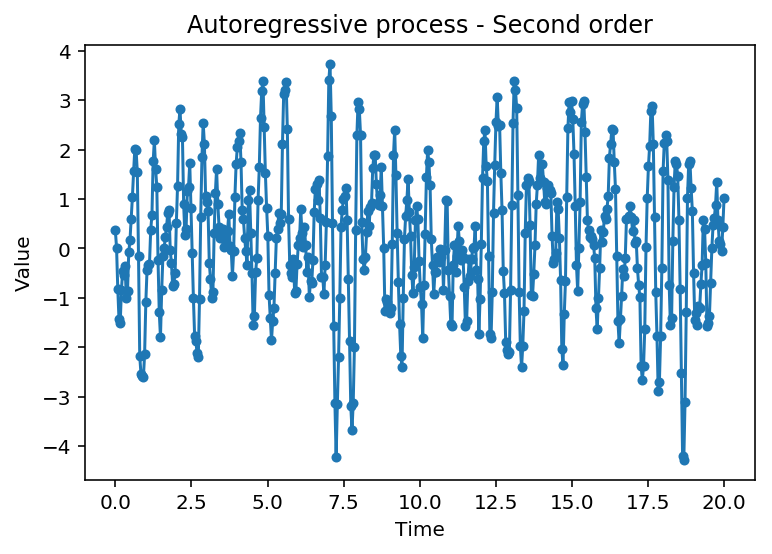

In [25]:
plt.plot(regular_time_samples, samples[0], marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Autoregressive process - Second order');

#### Mackey-Glass signals

In [26]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=1500)
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=1500, keep_percentage=75)

In [27]:
mg = ts.signals.MackeyGlass()
noise = ts.noise.GaussianNoise(std=0.1)
mg_series = ts.TimeSeries(signal_generator=mg, noise_generator=noise)
mg_samples, mg_signals, mg_errors = mg_series.sample(irregular_time_samples)

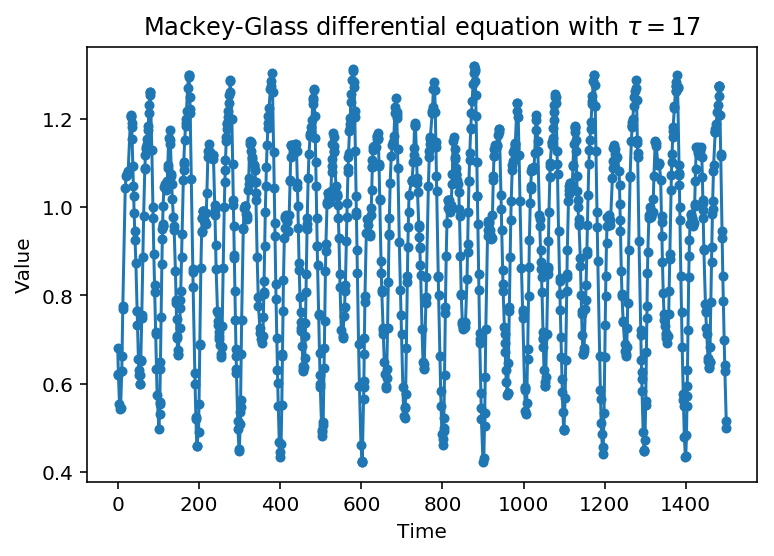

In [28]:
plt.plot(irregular_time_samples, mg_signals, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Mackey-Glass differential equation with $\\tau=17$');

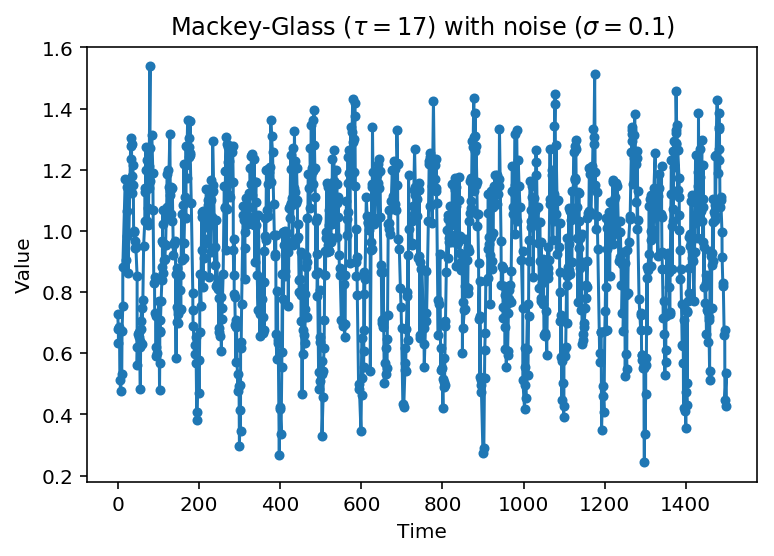

In [29]:
plt.plot(irregular_time_samples, mg_samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Mackey-Glass ($\\tau=17$) with noise ($\\sigma = 0.1$)');

#### NARMA series

Note: only regular sampled timestamps supported

In [24]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=500)
# Sampling irregular time samples
times = time_sampler.sample_regular_time(resolution=1.0)

In [25]:
# Take Samples
narma_signal= ts.signals.NARMA(order=3)
series = ts.TimeSeries(narma_signal)
samples, _, _ = series.sample(times)
print(len(samples[0]))

[0.1, 0.1, 0.1, 0.1]
500


In [11]:
samples[0][:10]

array([0.10414734, 0.1168539 , 0.1158621 , 0.12230384, 0.11697726,
       0.12785684, 0.11756851, 0.11682309, 0.12733962, 0.11751113])

In [8]:
samples[1][:10]

array([0.02469499, 0.27294646, 0.20572841, 0.32697207, 0.02593402,
       0.21647128, 0.28673056, 0.0012434 , 0.06326017, 0.36549257])

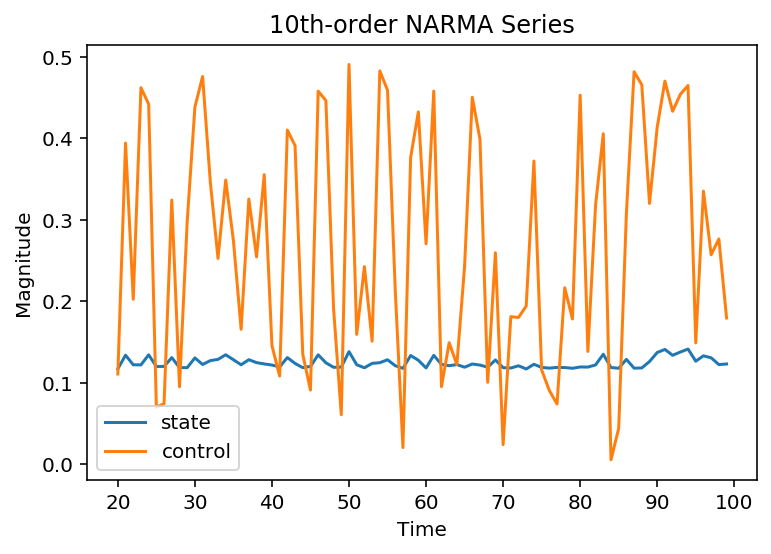

In [9]:
# Plotting the series
plt.plot(times[20:100], samples[0][20:100], label='state')
plt.plot(times[20:100], samples[1][20:100], label='control')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('10th-order NARMA Series');

Text(0.5, 1.0, '10th-order NARMA Series')

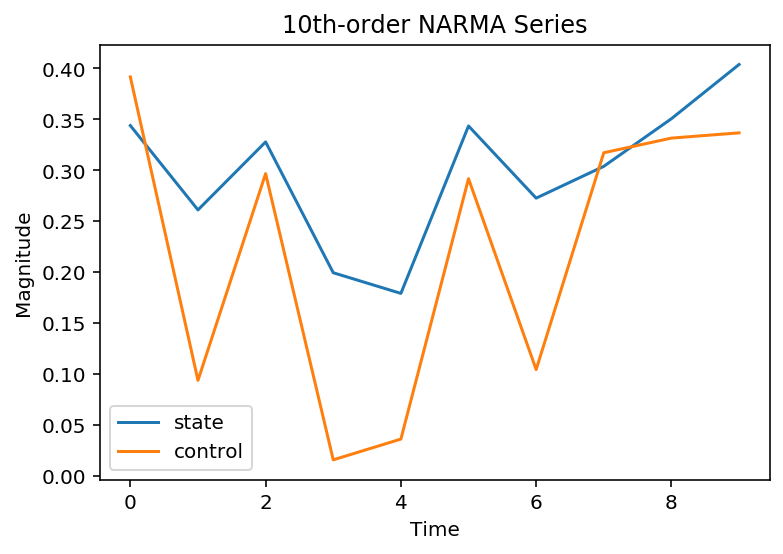

In [5]:
# Plotting the series
plt.plot(times, samples[0], label='state')
plt.plot(times, samples[1], label='control')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('10th-order NARMA Series')

In [8]:
with open("series2.csv",'ab') as f:
    np.savetxt(f, np.transpose(np.concatenate((np.expand_dims(samples[0], axis=0), np.expand_dims(samples[1],axis=0)), axis=0)),delimiter=',')